In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
reqlist = ["https://www.imdb.com/title/tt0109830/?ref_=fn_al_tt_1","https://www.imdb.com/title/tt0076759/?ref_=fn_tt_tt_1","https://www.imdb.com/title/tt0368226/?ref_=nv_sr_2", "https://www.imdb.com/title/tt0364751/","https://www.imdb.com/title/tt0121766/"]

In [30]:
i = 0
movietitle = []
movierating = []

while i < 5 :
    time.sleep(1)
    headers = {"user-agent": "MovieBot/1.0"}
    page = requests.get(reqlist[i], headers = headers)

    if page.status_code != requests.codes.ok :
        print("Request was not successful, status code:", page.status_code)
        print("Hit enter to continue...")
        input()
        exit()
    
# Parse page using BeautifulSoup
    soup = BeautifulSoup(page.content, 'html.parser')
    titletemp = soup.title.string.strip()
    title = titletemp.split(' - IMDb')
    print(title[0])
    movietitle.append(title[0])
    movies = soup.find_all('div', class_ = 'ipc-button__text')
    splitter = movies[6]
    print(type(movies))
    print(len(movies))
    movieratetemp = splitter.span.string.split()
    movierate = float(movieratetemp[0])
    print(movierate)
    movierating.append(movierate)
    i+=1


Forrest Gump (1994)
<class 'bs4.element.ResultSet'>
29
8.8
Star Wars (1977)
<class 'bs4.element.ResultSet'>
29
8.6
The Room (2003)
<class 'bs4.element.ResultSet'>
29
3.6
Without a Paddle (2004)
<class 'bs4.element.ResultSet'>
29
5.8
Star Wars: Episode III - Revenge of the Sith (2005)
<class 'bs4.element.ResultSet'>
29
7.6


In [31]:
df= pd.DataFrame(data = {"Movie":movietitle, "Rating":movierating})
df

,Movie,Rating
0,Forrest Gump (1994),8.8
1,Star Wars (1977),8.6
2,The Room (2003),3.6
3,Without a Paddle (2004),5.8
4,Star Wars: Episode III - Revenge of the Sith (...,7.6


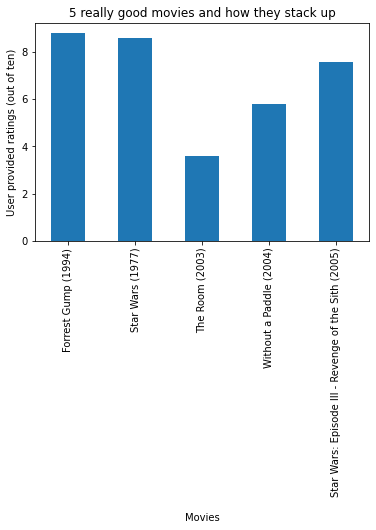

In [32]:
plt = df.plot.bar(x = "Movie", y = "Rating", 
            title = "5 really good movies and how they stack up",
            legend = False)

plt.set_xlabel("\nMovies")
plt.set_ylabel("User provided ratings (out of ten)")
None